# Interactias Geo Selected Network

One way of examining the impact of invasive species is to look at all their interactions and the interations those organisms have with each other. This full interaction network gives you a good idea whether a species might be a "keystone" species 

In this step of the evolution of this script it will be adapted to quantify species by their occupancy.

I will harvest species interactions data from GLOBI (https://www.globalbioticinteractions.org/) to discover the species that interact with an invasive species.
I will then harvest all the interactions for those species to create two tiers of interactions.
I will then count all the occurences of these in species in the Belgian datacube.
I will then create a network diagram to visualize this.

This notebook takes considerable insperation and code from Yikang Li's project on GLoBI (https://curiositydata.org/part1_globi_access/).

In [1]:
import sys
print(sys.version)

#Python 3.7.4 (default, Aug 9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
#pygbif 0.3.0

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pygbif import species
from pygbif import occurrences as occ

### Setting up some parameters

In [102]:
# There is no point accepting all the species that have more than one record.
# There are too many casual records of plants and biirds
thresholdForOccNum = 5

In [4]:
## Define the country of interest
country  = 'BE'

## Define the year from where to consider records for the occupancy
year = 2000

### Define the key taxon for the notebook for which to find all interactions


In [43]:
taxon = "Oxalis corniculata"
#taxon = "Oxalis pes-caprae"
#taxon = "Abramis brama"
#taxon = "Dikerogammarus villosus" # killer shrimp
#taxon = "Lantanophaga pusillidactyla"
#taxon = "Lantana camara"
#taxon = "Cirsium vulgare"
#taxon = "Solenopsis invicta"
#taxon = "Linepithema humile" #Argentine ant
#taxon = "Procyon lotor" # raccoon
#taxon = "Carpobrotus edulis"
#taxon = "not exist"
#taxon = "Sciurus carolinensis" # Eastern grey squirrel

## Load the GLoBI data

The current snapshot of GLoBI was taken on 2019-11-05 from https://depot.globalbioticinteractions.org/snapshot/target/data/tsv/interactions.tsv.gz


In [6]:
# This takes a few minutes to load in.
# the low_memory=False property will get rid of a warning, but will not help if there is really no memory left
data = pd.read_csv('C://Users//quentin//Documents//interactias//interactias//data//interactions.tsv', delimiter='\t', encoding='utf-8', low_memory=False)
len(data)

3878740

In [7]:
# Take a little look at the data to make sure it makes sense
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
3,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
4,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z


## Drop duplicates

This line gets rid of duplicate interations. I currently can't see a reason to keep them, but this perhaps should be checked. 
Some more common interactions might have more support in the literature and therefore more records. Deduplicating them tends to equal out rare interactions with common ones.

In [8]:
data.drop_duplicates(['sourceTaxonName', 'interactionTypeName', 'targetTaxonName'], inplace = True)

In [9]:
## Check how many rows are left
len(data)

1103723

## Remove ranks that are not species
Many entries in GLoBI are non-specific interations at a high taxonomic level. For example, roses are visited by bees.
I have chossen to remove these interactions from the study, at least preliminarly

In [10]:
data.drop(data[data['sourceTaxonRank'] != 'species'].index, inplace = True)
data.drop(data[data['targetTaxonRank'] != 'species'].index, inplace = True)

In [11]:
## Check how many rows are left
len(data)

536018

## Remove "interactsWith"
There are many vague interactions with the term interactsWith. These aren't really that useful, because it could be any kind of interaction, positive or negative, direct or indirect.
Unwanted interactions can be removed as an option by removing the commenting from these lines

In [12]:
data = data[data.interactionTypeName != 'interactsWith']

#data = data[data.interactionTypeName != 'visitsFlowersOf']

#data = data[data.interactionTypeName != 'pollinates']

len(data)

394573

## Check to see if the taxon exits in GBIF

In [44]:
try:
    #NOTE: The function method name_suggest has a different behavior with regards to the gender of Latin names to name_backbone
    # If name_backbone is given a name in one gender it can still return the best match from the GBIF backbone if that
    # name is spelled as if it was another gender.
    #key = species.name_suggest(q=taxon, limit = 1)
    match = species.name_backbone(name=taxon, limit = 1)
    #print(key)
    
    # if there is no match this is returned form .name_backbone {'confidence': 100, 'matchType': 'NONE', 'synonym': False}
    if match['matchType'] == 'NONE':
        raise ValueError("TAXON NOT FOUND ON GBIF!")
    else:
        key = match['usageKey']
except ValueError as ve:
    print(ve)
    exit(1)




In [45]:

print('The taxon to be studied is ' + match['scientificName'])

The taxon to be studied is Oxalis corniculata L.


In [46]:
# What are all the types of interactions involving taxon as source taxon?
data[data['sourceTaxonName'] == taxon]['interactionTypeName'].unique()

array([], dtype=object)

In [47]:
# What are all the types of interactions involving taxon as target taxon?
data[data['targetTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'visitsFlowersOf', 'hasHost', 'mutualistOf',
       'pathogenOf', 'pollinates'], dtype=object)

How many taxon sources do I have?

In [48]:
len(data[data['sourceTaxonName'] == taxon])

0

How many taxon targets do I have?

In [49]:
len(data[data['targetTaxonName'] == taxon])

48

## Get the primary interation data for the species in question

In [50]:
    interactDataTaxon = data[data['targetTaxonName'] == taxon]
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == taxon])

In [51]:
interactDataTaxon.count()

sourceTaxonId                48
sourceTaxonIds               48
sourceTaxonName              47
sourceTaxonRank              48
sourceTaxonPathNames         48
                             ..
sourceCitation               48
sourceNamespace              48
sourceArchiveURI             48
sourceDOI                    10
sourceLastSeenAtUnixEpoch    48
Length: 80, dtype: int64

## Get a list of all the primary interacting species

In [52]:
interactingTaxa = pd.DataFrame(interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique())

In [53]:
interactingTaxa

,0
0,Anas aucklandica
1,Callipepla californica
2,Melozone crissalis
3,Haemorhous mexicanus
4,Puccinia sorghi
5,Erysiphe russellii
6,Zizula hylax
7,Pseudozizeeria maha
8,Lucia limbaria
9,Zizeeria knysna


## Get all the secondary interactions

In [54]:
for name in interactingTaxa[0]:
    interactDataTaxon = interactDataTaxon.append(data[data['targetTaxonName'] == name])
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == name])

In [55]:
interactDataTaxon.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
193783,EOL:1048468,EOL:1048468 | WD:Q262071 | EOL:1048468,Anas aucklandica,species,Anas aucklandica,EOL:1048468,species,Anas aucklandica,EOL:1048468,NaN,...,1.136074e+12,https://en.wiktionary.org/wiki/support,"Moore, S.J., P.F. Battley, I.M. Henderson, and...",NaN,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
212212,EOL_V2:1049189,EOL_V2:1049189 | OTT:340882 | WD:Q830385 | NCB...,Callipepla californica,species,Animalia | Chordata | Aves | Galliformes | Odo...,EOL:1 | EOL:694 | EOL:695 | EOL:7589 | EOL:759...,kingdom | phylum | class | order | family | ge...,Callipepla californica,EOL_V2:1049189,Callipepla,...,-1.864598e+12,https://en.wiktionary.org/wiki/support,"Beal, F. E. L. 1910. Birds of California in re...",NaN,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
212652,GBIF:7341600,GBIF:7341600 | OTT:3597248 | INAT_TAXON:73044 ...,Melozone crissalis,species,Animalia | Chordata | Aves | Passeriformes | E...,GBIF:1 | GBIF:44 | GBIF:212 | GBIF:729 | GBIF:...,kingdom | phylum | class | order | family | ge...,Melozone crissalis,GBIF:7341600,Melozone,...,-1.864598e+12,https://en.wiktionary.org/wiki/support,"Beal, F. E. L. 1910. Birds of California in re...",NaN,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
213107,ITIS:997805,ITIS:997805 | OTT:711865 | GBIF:8323485 | WD:Q...,Haemorhous mexicanus,species,Animalia | Bilateria | Deuterostomia | Chordat...,ITIS:202423 | ITIS:914154 | ITIS:914156 | ITIS...,kingdom | subkingdom | infrakingdom | phylum |...,Haemorhous mexicanus,ITIS:997805,Haemorhous,...,-2.177453e+12,https://en.wiktionary.org/wiki/support,"Beal, F. E. L. 1907. Birds of California in re...",NaN,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
1131090,GBIF:2514966,GBIF:2514966 | OTT:42566 | EOL:1017401 | GBIF:...,Puccinia sorghi,species,Fungi | Basidiomycota | Pucciniomycetes | Pucc...,GBIF:5 | GBIF:34 | GBIF:270 | GBIF:1126 | GBIF...,kingdom | phylum | class | order | family | ge...,Puccinia sorghi,GBIF:2514966,Puccinia,...,NaN,https://en.wiktionary.org/wiki/support,"Laundon, G.F. & Waterston, J.M.. 1964. Puccini...",NaN,NaN,Food Webs and Species Interactions in the Biod...,globalbioticinteractions/bioinfo,https://zenodo.org/record/1419646/files/global...,10.5281/zenodo.1419646,2019-11-02T23:26:01.682Z


In [56]:
interactingTaxa = pd.DataFrame(interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique())

In [57]:
interactingTaxa

,0
0,Anas aucklandica
1,Callipepla californica
2,Melozone crissalis
3,Haemorhous mexicanus
4,Puccinia sorghi
...,...
826,Murdannia keisak
827,Aster hispidus
828,Solidago virgaurea
829,Helichrysum stoechas


In [58]:
    cleanInteractDataTaxon = interactDataTaxon[['sourceTaxonId', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonFamilyName', 'interactionTypeName',
       'targetTaxonName','targetTaxonRank',
        ]].dropna(subset=['targetTaxonName','sourceTaxonName'])

In [59]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
193783,EOL:1048468,Anas aucklandica,species,NaN,eats,Oxalis corniculata,species
212212,EOL_V2:1049189,Callipepla californica,species,Odontophoridae,eats,Oxalis corniculata,species
212652,GBIF:7341600,Melozone crissalis,species,Emberizidae,eats,Oxalis corniculata,species
213107,ITIS:997805,Haemorhous mexicanus,species,Fringillidae,eats,Oxalis corniculata,species
1131090,GBIF:2514966,Puccinia sorghi,species,Pucciniaceae,parasiteOf,Oxalis corniculata,species


In [60]:
# How many different sort of interaction do I have left?
# Checking out all the interaction types
cleanInteractDataTaxon['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'visitsFlowersOf', 'hasHost', 'mutualistOf',
       'pathogenOf', 'pollinates', 'ectoParasiteOf', 'endoparasiteOf',
       'endoparasitoidOf', 'preysOn'], dtype=object)

In [61]:
cleanInteractDataTaxon.groupby(cleanInteractDataTaxon['interactionTypeName']).size().sort_values(ascending = False)

interactionTypeName
pollinates          560
mutualistOf         401
eats                357
visitsFlowersOf     284
parasiteOf           75
hasHost              33
pathogenOf           29
ectoParasiteOf        7
preysOn               3
endoparasitoidOf      2
endoparasiteOf        2
dtype: int64

In [62]:
len(cleanInteractDataTaxon)

1753

In [63]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
193783,EOL:1048468,Anas aucklandica,species,NaN,eats,Oxalis corniculata,species
212212,EOL_V2:1049189,Callipepla californica,species,Odontophoridae,eats,Oxalis corniculata,species
212652,GBIF:7341600,Melozone crissalis,species,Emberizidae,eats,Oxalis corniculata,species
213107,ITIS:997805,Haemorhous mexicanus,species,Fringillidae,eats,Oxalis corniculata,species
1131090,GBIF:2514966,Puccinia sorghi,species,Pucciniaceae,parasiteOf,Oxalis corniculata,species


## Create a file with all the nodes and their attributes

In [64]:
# Get the source nodes
nodes = cleanInteractDataTaxon.drop_duplicates(subset=['sourceTaxonName'])

In [65]:
# Get the target nodes
nodes = nodes.append(cleanInteractDataTaxon.drop_duplicates(subset=['targetTaxonName']))

In [66]:
nodes.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
193783,EOL:1048468,Anas aucklandica,species,NaN,eats,Oxalis corniculata,species
212212,EOL_V2:1049189,Callipepla californica,species,Odontophoridae,eats,Oxalis corniculata,species
212652,GBIF:7341600,Melozone crissalis,species,Emberizidae,eats,Oxalis corniculata,species
213107,ITIS:997805,Haemorhous mexicanus,species,Fringillidae,eats,Oxalis corniculata,species
1131090,GBIF:2514966,Puccinia sorghi,species,Pucciniaceae,parasiteOf,Oxalis corniculata,species


In [67]:
interactingTaxa.count()


0    830
dtype: int64

### This function takes a name string and checks on GBIF to see if the name exists there.

In [68]:
def speciesExistsInGBIF(name, rank):
    try:
        match = species.name_backbone(name=name, rank=rank, limit = 1)

        # if there is no match this is returned from .name_backbone {'confidence': 100, 'matchType': 'NONE', 'synonym': False}
        if match['matchType'] == 'NONE':
            return False
        else:
            return match
    except ValueError as ve:
        print(ve)
        exit(1)

### Check that the species in question is actually found on GBIF

In [69]:
if(speciesExistsInGBIF(taxon, "species") == False):
    print("##### {0} has not been found on GBIF #####".format(taxon))

### Check to see which taxa in the interaction network are found in GBIF and list those ones that are not

In [70]:
taxaFound = {}

print('Taxa from GLoBI, but not found in GBIF')
for name in interactingTaxa.iterrows():
    GBIFName = speciesExistsInGBIF(name[1], "species")
    if GBIFName == False:
        print(name[1][0])
        taxaFound[name[1][0]] = False
    else:
        taxaFound[name[1][0]] = GBIFName['usageKey']
    

Taxa from GLoBI, but not found in GBIF
Tomato leaf curl China virus - OX2
Ageratum Yellow vein China virus - OX1
nan
Alphavirus
NPV
Cypovirus
Ficus carica
Digitalis purpurea
Sida spinosa
Salix ambigua
Salix longifolia


In [71]:
# Convert to a Pandas dataframe
taxaFound = pd.DataFrame.from_dict(taxaFound, orient='index')

In [72]:
len(taxaFound)

831

In [73]:
taxaFound.head(2)

,0
Anas aucklandica,2498078
Callipepla californica,5228080


## Create a SQLite database with APSW

In [74]:
import sqlite3
from sqlite3 import Error

In [75]:
database = r"C:\Users\quentin\Documents\interactiasOcc\interactias\data\cube.db"
try:
    conn = sqlite3.connect(database)
except Error as e:
    print(e)

In [76]:

 
sql_create_cube_table = """ CREATE TABLE IF NOT EXISTS cube (
                                        year integer,
                                        eea_cell_code text NOT NULL,
                                        taxonKey integer,
                                        n integer,
                                        min_coord_uncertainty float
                                    ); """
 

In [77]:
# create table
try:
    conn.execute(sql_create_cube_table)
except Error as e:
    print(e)

In [78]:
## Clear down the table before filling it up again

In [79]:

conn.execute('DELETE FROM cube')

In [80]:
with open(r"C:\Users\quentin\Documents\occ-processing\data\processed\cube_belgium.tsv", "r") as f:
    rows = f.readlines()
    for row in rows:
        fields = row.split('\t')
        conn.execute(f'INSERT INTO cube(year, eea_cell_code, taxonKey, n, min_coord_uncertainty)'\
                     f"VALUES ('{fields[0]}','{fields[1]}','{fields[2]}','{fields[3]}','{fields[4]}')") 
conn.commit()

In [81]:
print(conn.execute('SELECT count(year) FROM cube'))
conn.close()

### This function takes a GBIF species key and counts how many occurences exist in the data cube

In [82]:
def speciesCountInCube(conn, key):
    count = 0
    cur = conn.cursor()
    cur.execute("SELECT COUNT(taxonKey) from (SELECT taxonKey FROM cube WHERE year > ? and taxonKey = ? GROUP BY eea_cell_code)", (year, key,))
    return(cur.fetchall())

### Loop over all the taxa that are in the interaction network and are in GBIF to find the ones that have been found in the country

In [103]:
taxaFoundInCountry = []

try:
    conn = sqlite3.connect(database)
except Error as e:
    print(e)

In [104]:
for GBIFtaxon in taxaFound.iterrows():
    #print('{0} found {1} time in Belgium.'.format(GBIFtaxon,speciesCountInGBIF(GBIFtaxon,country)))
    GBIFOccCount = speciesCountInCube(conn, GBIFtaxon[1][0])
    if GBIFOccCount[0][0] > thresholdForOccNum: # The threshold for observations is not greater than one, due to all the casual records
        taxaFoundInCountry.append({'key': GBIFtaxon[1][0], 'species': GBIFtaxon[0], 'count': GBIFOccCount[0][0]})
        print('{0} with key {1} occurs in {2} km squares.'.format(GBIFtaxon[0],GBIFtaxon[1][0],GBIFOccCount[0][0]))

Callipepla californica with key 5228080 occurs in 12 km squares.
Haemorhous mexicanus with key 8323485 occurs in 22 km squares.
Buteo jamaicensis with key 2480542 occurs in 10 km squares.
Falco sparverius with key 9685907 occurs in 9 km squares.
Verbena bonariensis with key 2925514 occurs in 631 km squares.
Dittrichia graveolens with key 3101193 occurs in 95 km squares.
Brassica napus with key 3042636 occurs in 1373 km squares.
Foeniculum vulgare with key 3034922 occurs in 702 km squares.
Lepidium latifolium with key 5376692 occurs in 77 km squares.
Medicago polymorpha with key 2965531 occurs in 78 km squares.
Coriandrum sativum with key 3034871 occurs in 68 km squares.
Eschscholzia californica with key 2888380 occurs in 251 km squares.
Lobularia maritima with key 5373358 occurs in 399 km squares.
Malva parviflora with key 3152378 occurs in 45 km squares.
Carduus pycnocephalus with key 3114667 occurs in 6 km squares.
Oxalis corniculata with key 8427624 occurs in 2897 km squares.
Milax 

In [105]:
# Convert to a Pandas dataframe
taxaFoundInCountry = pd.DataFrame(taxaFoundInCountry)    

In [106]:
print("The number of species left in the network is {0}".format(len(taxaFoundInCountry)))

The number of species left in the network is 113


In [107]:
taxaFoundInCountry

,key,species,count
0,5228080,Callipepla californica,12
1,8323485,Haemorhous mexicanus,22
2,2480542,Buteo jamaicensis,10
3,9685907,Falco sparverius,9
4,2925514,Verbena bonariensis,631
...,...,...,...
108,2926572,Physostegia virginiana,23
109,3152493,Anoda cristata,12
110,3188859,Oenothera speciosa,6
111,3152583,Hibiscus syriacus,85


## Drawing a network of the interactions

Now that I have a list of all the species in the country I can use this as my nodes list for the network diagram.

In [108]:
#networkx seems to be a leading network tool in Python
import networkx as nx
import matplotlib.pyplot as plt

In [109]:
# Create graphic object
G = nx.DiGraph()

In [110]:
# Match colours to interactions to distinguish them on the graph
colorInteractions = {'interaction':['pollinates', 'mutualistOf', 'eats', 'visitsFlowersOf', 'hasHost', 'parasiteOf', 'pathogenOf'],
        'colour':['r', 'g', 'b', 'y', 'm', 'w', 'c']}  

colorInteractionsDf = pd.DataFrame(colorInteractions)

len(list(G.nodes))

0

In [111]:
cleanInteractDataTaxon

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
193783,EOL:1048468,Anas aucklandica,species,NaN,eats,Oxalis corniculata,species
212212,EOL_V2:1049189,Callipepla californica,species,Odontophoridae,eats,Oxalis corniculata,species
212652,GBIF:7341600,Melozone crissalis,species,Emberizidae,eats,Oxalis corniculata,species
213107,ITIS:997805,Haemorhous mexicanus,species,Fringillidae,eats,Oxalis corniculata,species
1131090,GBIF:2514966,Puccinia sorghi,species,Pucciniaceae,parasiteOf,Oxalis corniculata,species
...,...,...,...,...,...,...,...
2716283,EOL_V2:3816701,Sapyga centrata,species,Sapygidae,pollinates,Oxalis corniculata,species
2716287,EOL:1046464,Andrena pruni,species,Andrenidae,pollinates,Oxalis corniculata,species
2716288,EOL:1045322,Ceratina dupla,species,Apidae,pollinates,Oxalis corniculata,species
3491429,EOL:750934,Paragus haemorrhous,species,Syrphidae,visitsFlowersOf,Oxalis corniculata,species


## Figure out which node has the most records

In [112]:
maxRecords = taxaFoundInCountry.max()["count"]
print(maxRecords)

6724


## Add the nodes and the edges to the graph

In [113]:
dictOfNodeSizes = {}

# iterate over rows with iterrows()

for index, row in taxaFoundInCountry.iterrows():
     # access data using column names
    print('A: ', row['species'], row['count'], row['key'])
    G.add_node(row['species'])
    dictOfNodeSizes[row['species']] = int(row['count']/maxRecords*5000)+10

    for edge in cleanInteractDataTaxon.iterrows():
        if row['species'] == edge[1]['sourceTaxonName']:
            print('B: ', edge[1]['sourceTaxonName'], edge[1]['targetTaxonName'])
            for index2, row2 in taxaFoundInCountry.iterrows():
                #print(row2['species'])
                if row2['species'] == edge[1]['targetTaxonName']: 
                    print('C: ', edge[1]['sourceTaxonName'],row2['species'])
                    G.add_edge(edge[1]['sourceTaxonName'], row2['species'], label = edge[1]['interactionTypeName'])
                    
len(list(G.nodes))


A:  Callipepla californica 12 5228080
B:  Callipepla californica Oxalis corniculata
C:  Callipepla californica Oxalis corniculata
B:  Callipepla californica Margyricarpus pinnatus
B:  Callipepla californica Phaseolus vulgaris
C:  Callipepla californica Phaseolus vulgaris
B:  Callipepla californica Lens culinaris
C:  Callipepla californica Lens culinaris
B:  Callipepla californica Polygonum aviculare
B:  Callipepla californica Panicum capillare
C:  Callipepla californica Panicum capillare
B:  Callipepla californica Convolvulus arvensis
B:  Callipepla californica Chenopodium album
B:  Callipepla californica Brassica rapa
C:  Callipepla californica Brassica rapa
B:  Callipepla californica Echium vulgare
B:  Callipepla californica Madia sativa
B:  Callipepla californica Centaurea melitensis
C:  Callipepla californica Centaurea melitensis
B:  Callipepla californica Gevuina avellana
B:  Callipepla californica Zea mays
C:  Callipepla californica Zea mays
B:  Callipepla californica Avena sativ

A:  Centaurea melitensis 6 3128091
A:  Zea mays 169 5290052
A:  Avena sativa 241 2705290
A:  Amaranthus retroflexus 1091 6109534
A:  Raphanus sativus 289 7678610
A:  Sisymbrium altissimum 567 3046736
A:  Triticum aestivum 379 7795888
A:  Helianthus annuus 449 9206251
A:  Echinochloa crus-galli 5007 2702808
A:  Malva pusilla 71 3152372
A:  Melilotus albus 3747 2971095
A:  Verbena hastata 36 2925527
A:  Silybum marianum 362 3145214
A:  Dysphania botrys 7 5568428
A:  Digitaria sanguinalis 2040 5289972
A:  Ambrosia psilostachya 18 3110686
A:  Bidens pilosa 7 5391845
A:  Oxalis dillenii 10 2891677
A:  Medicago sativa 2434 9151957
A:  Spinacia oleracea 22 3083647
A:  Glycine max 23 5359660
A:  Amaranthus viridis 6 5384334
A:  Brassica oleracea 202 3042845
A:  Armoracia rusticana 478 3041022
A:  Tropaeolum majus 134 2889934
A:  Sisymbrium irio 19 3046851
A:  Lunaria annua 1055 5373324
A:  Hesperis matronalis 543 3042291
A:  Brassica juncea 71 3042751
A:  Barbarea verna 54 5374672
A:  Lepidium

113

In [114]:
# iterate over rows with iterrows()
for index, row in taxaFoundInCountry.iterrows():
    for edge in cleanInteractDataTaxon.iterrows():
        if row['species'] == edge[1]['targetTaxonName']:
            #print(edge[1]['sourceTaxonName'], edge[1]['targetTaxonName'],row['species'])
            for index2, row2 in taxaFoundInCountry.iterrows():
                #print(row2['species'])
                if row2['species'] == edge[1]['sourceTaxonName']: 
                    #print(edge[1]['targetTaxonName'],row2['species'])
                    G.add_edge(row2['species'], edge[1]['targetTaxonName'], label = edge[1]['interactionTypeName'])

In [115]:
print("Number of nodes = {0}".format(G.number_of_nodes()))
print("Number of edges = {0}".format(G.number_of_edges()))

Number of nodes = 113
Number of edges = 29


In [116]:
len(dictOfNodeSizes)

113

## Remove any nodes that have no edges.
This happens because some of the linking nodes have few supporting observations and so have been weeded out


In [117]:
for n in list(G.nodes):
    if G.degree(n) == 0:
        G.remove_node(n)

In [118]:
len(G.nodes)

26

## Run through the list of nodes again and construct a list of the node sizes in the correct order

In [119]:
listOfNodeSizes = []

for node in list(G.nodes):
    listOfNodeSizes.append(dictOfNodeSizes[node])

## A network of all the interacting taxa

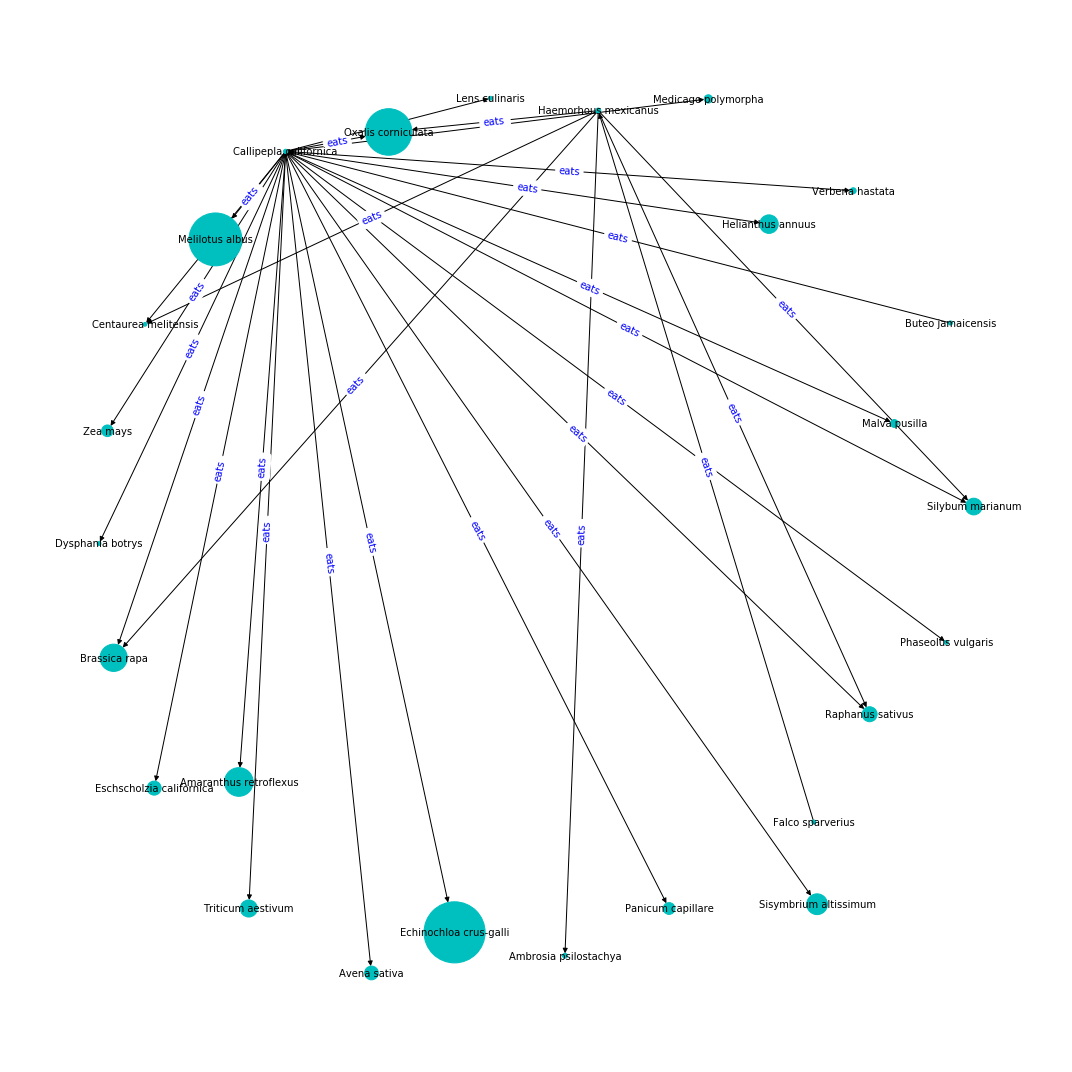

In [123]:
plt.figure(figsize=(15,15))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G, iterations=50, k=50) 
#pos = nx.spring_layout(G)
#pos = nx.random_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.shell_layout(G, scale=1)

nodeColors = nx.get_node_attributes(G,'color')

nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=10, font_color='blue')

#nx.draw_networkx_nodes(G, pos, node_color=nodeColors.values())

nx.draw_networkx(G, pos, with_labels=True, node_size = listOfNodeSizes, node_color='c', alpha= 1, arrows=True, 
                    linewidths=1, font_color="black", font_size=10, style = 'dashed')

plt.axis('off')
plt.tight_layout()
plt.show()

In [339]:
with open(taxon+country+".html", "w") as file:
    file.write(" \
<!DOCTYPE html> \
<html> \
<head> \
<script src='cytoscape.min.js'></script> \
<script src='cytoscape-cose-bilkent.js'></script> \
</head> \
<style>#cy {width: 100%; height: 100%; position: absolute; top: 50px; left: 0px;}\
body {font-family: 'times; font-size: 8px;}\
</style> \
<body> \
<div id='cy'></div> \
<script> \
var cy = cytoscape({ \
  container: document.getElementById('cy'), \n \
  elements: [ \
")

### Write nodes to file

In [340]:
file = open(taxon+country+".html", "a")
for n in list(G.nodes):
    file.write("{ data: { id: '"+n+"' } },\n")
file.close()

## Write edges to file

In [341]:
file = open(taxon+country+".html", "a")
for edge in list(G.edges):
    file.write("{data: {id: '"+edge[0]+edge[1]+"', source: '"+edge[0]+"', target: '"+edge[1]+"'}},\n")
file.close()
    

In [342]:
with open(taxon+country+".html", "a") as file:
    file.write("], \
style: [ \n\
        { \n\
            selector: 'node', \n\
            style: { \n\
                shape: 'circle', \n\
                'background-color': 'green', \n\
                label: 'data(id)', \n\
                'font-family': 'helvetica', \n\
                'font-size': '8px' \n\
            } \n\
        }], \n\
layout:  { \n\
            name: 'cose', padding: 10, animate: true, gravity: 30 \n\
     } \n\
}); \n\
\
</script> \
<h1>"+taxon+" in "+country+"</h1> \
</body> \
</html>")

#### U. Dogrusoz, E. Giral, A. Cetintas, A. Civril, and E. Demir, "A Layout Algorithm For Undirected Compound Graphs", Information Sciences, 179, pp. 980-994, 2009.